# Data analysis.

In [5]:
import pandas as pd

In [ ]:
df = pd.read_csv("C:\Users\siddh\OneDrive\Desktop\Fraud.csv")


df.head(10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048562 entries, 0 to 1048561
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            533901 non-null  float64
 1   type            533901 non-null  object 
 2   amount          533901 non-null  float64
 3   nameOrig        533901 non-null  object 
 4   oldbalanceOrg   533901 non-null  float64
 5   newbalanceOrig  533901 non-null  float64
 6   nameDest        533901 non-null  object 
 7   oldbalanceDest  533901 non-null  float64
 8   newbalanceDest  533901 non-null  float64
 9   isFraud         533901 non-null  float64
 10  isFlaggedFraud  533901 non-null  float64
dtypes: float64(8), object(3)
memory usage: 88.0+ MB


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,533901.000000,5.339010e+05,5.339010e+05,5.339010e+05,5.339010e+05,5.339010e+05,533901.000000,533901.0
mean,14.295117,1.638802e+05,9.058016e+05,9.255633e+05,9.813447e+05,1.154825e+06,0.000440,0.0
std,3.907549,2.688845e+05,3.005144e+06,3.042226e+06,2.330783e+06,2.498101e+06,0.020975,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.305871e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,15.000000,7.981063e+04,1.840969e+04,0.000000e+00,1.209158e+05,2.198743e+05,0.000000,0.0
75%,18.000000,2.190044e+05,1.658118e+05,2.050706e+05,8.975790e+05,1.192217e+06,0.000000,0.0
max,21.000000,1.000000e+07,3.890000e+07,3.890000e+07,4.150000e+07,4.150000e+07,1.000000,0.0


##### The dataset contains 243,473 entries with 11 columns. However, only 103,391 entries are non-null, indicating a significant number of missing values. The columns include both numerical and categorical data types. Let's proceed with visualizing some key aspects of the data to gain insights.

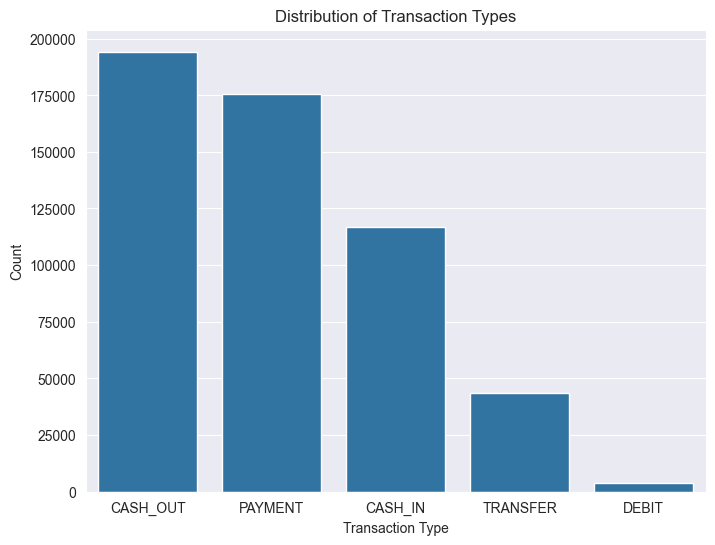

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

##### The distribution of transaction types shows the frequency of each type in the dataset, with the cash_out being higest.

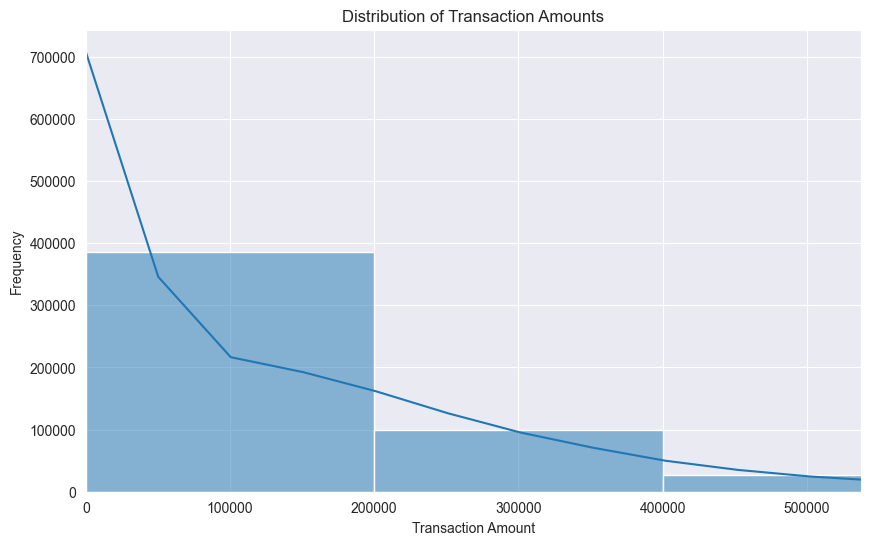

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, df['amount'].quantile(0.95))
plt.show()

##### The distribution of transaction amounts is right-skewed, with most transactions being of lower amounts. Let's now explore the relationship between transaction types and fraud occurrences.

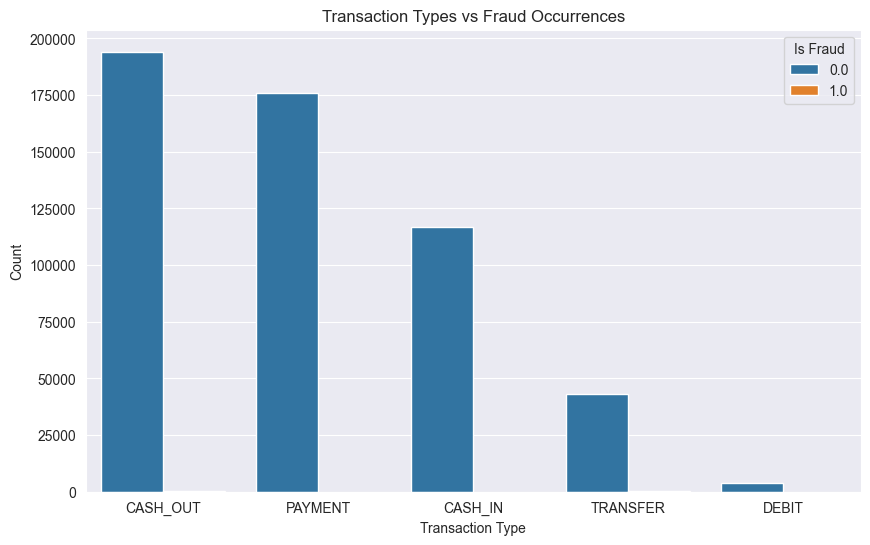

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', order=df['type'].value_counts().index)
plt.title('Transaction Types vs Fraud Occurrences')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

##### The visualization shows the distribution of fraud occurrences across different transaction types. Let's further analyze the correlation between numerical features and fraud.

###### the values nameOrig and nameDest do not influence the correlation values that much. Then I shall do one hot encoding on this to convert the categorical data into numerical data.



In [20]:
numeric_df = df.drop(columns=['nameOrig', 'nameDest'])
categorical_cols = ['type']
numeric_df_encoded = pd.get_dummies(numeric_df, columns=categorical_cols, drop_first=True)

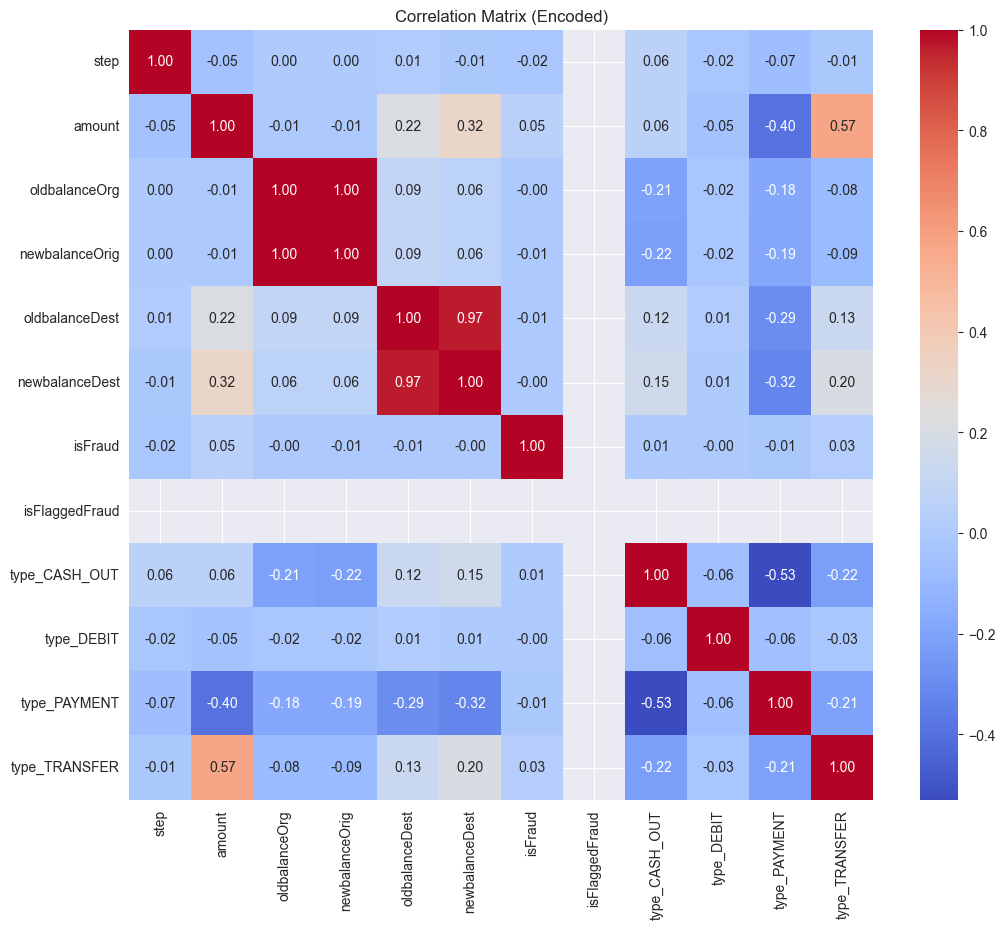

In [21]:
correlation_matrix_encoded = numeric_df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Encoded)')
plt.show()

# Data Cleaning

In [8]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

missing_values, duplicates

(step              514661
 type              514661
 amount            514661
 nameOrig          514661
 oldbalanceOrg     514661
 newbalanceOrig    514661
 nameDest          514661
 oldbalanceDest    514661
 newbalanceDest    514661
 isFraud           514661
 isFlaggedFraud    514661
 dtype: int64,
 np.int64(514660))

In [9]:
df = df.drop_duplicates()
df = df.dropna()

missing_values_after = df.isnull().sum()
remaining_duplicates = df.duplicated().sum()

missing_values_after, remaining_duplicates, df.shape

(step              0
 type              0
 amount            0
 nameOrig          0
 oldbalanceOrg     0
 newbalanceOrig    0
 nameDest          0
 oldbalanceDest    0
 newbalanceDest    0
 isFraud           0
 isFlaggedFraud    0
 dtype: int64,
 np.int64(0),
 (533901, 11))

##### I have dropped the missig values and dupliactes in the dataset.

In [10]:
df.dtypes

step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [27]:
import numpy as np
categorical_cols = ['type']
numeric_df_encoded = pd.get_dummies(numeric_df, columns=categorical_cols, drop_first=True)

for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    percentile_99 = numeric_df_encoded[col].quantile(0.99)
    numeric_df_encoded[col] = np.where(numeric_df_encoded[col] > percentile_99, percentile_99, numeric_df_encoded[col])


In [32]:
correlation_matrix_encoded = numeric_df_encoded.corr()
correlation_matrix_encoded


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,-0.037672,0.000120,0.000713,0.016255,-0.013377,-0.020598,NaN,0.057746,-0.017778,-0.069695,-0.011354
amount,-0.037672,1.000000,-0.003564,-0.002874,0.260404,0.363980,0.025962,NaN,0.089731,-0.057715,-0.456370,0.593950
oldbalanceOrg,0.000120,-0.003564,1.000000,0.999075,0.109404,0.072130,-0.000222,NaN,-0.224491,-0.024430,-0.192012,-0.087639
newbalanceOrig,0.000713,-0.002874,0.999075,1.000000,0.111104,0.071321,-0.006628,NaN,-0.235545,-0.024824,-0.195915,-0.094202
oldbalanceDest,0.016255,0.260404,0.109404,0.111104,1.000000,0.966285,-0.005703,NaN,0.140892,0.009410,-0.334204,0.146242
newbalanceDest,-0.013377,0.363980,0.072130,0.071321,0.966285,1.000000,-0.001628,NaN,0.174874,0.006123,-0.363565,0.226519
isFraud,-0.020598,0.025962,-0.000222,-0.006628,-0.005703,-0.001628,1.000000,NaN,0.006774,-0.001797,-0.014699,0.030718
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_CASH_OUT,0.057746,0.089731,-0.224491,-0.235545,0.140892,0.174874,0.006774,NaN,1.000000,-0.064765,-0.529748,-0.224737
type_DEBIT,-0.017778,-0.057715,-0.024430,-0.024824,0.009410,0.006123,-0.001797,NaN,-0.064765,1.000000,-0.059987,-0.025449


In [30]:
selected_features = numeric_df_encoded.drop(columns=['newbalanceOrig', 'newbalanceDest'])

selected_features.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1.0,9839.64,170136.0,0.0,0.0,0.0,False,False,True,False
1,1.0,1864.28,21249.0,0.0,0.0,0.0,False,False,True,False
2,1.0,181.00,181.0,0.0,1.0,0.0,False,False,False,True
3,1.0,181.00,181.0,21182.0,1.0,0.0,True,False,False,False
4,1.0,11668.14,41554.0,0.0,0.0,0.0,False,False,True,False


##### I have found that newbalanceOrig and newbalanceDest are highly corelated and decided to remove them for better performance of the model,, (This is done after the model evaluation at that time the score was around 0.86), We can easily find this by watching the heatmap itself.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y = selected_features['isFraud']
X = selected_features.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

#evaluation
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)



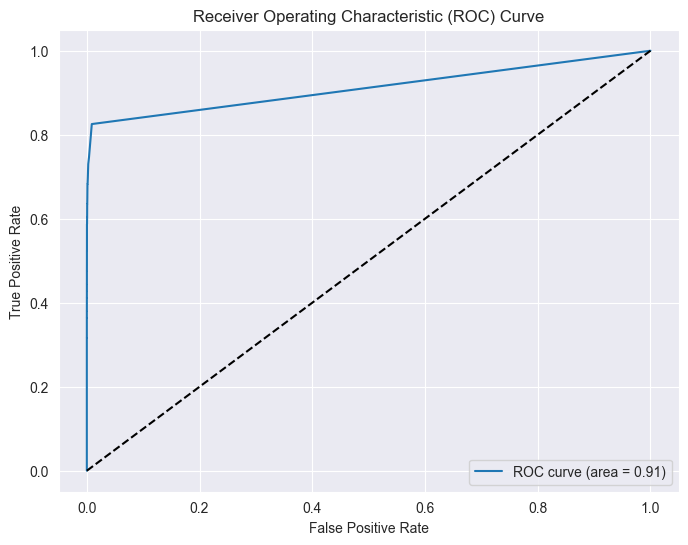

('              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00    160108\n         1.0       0.88      0.35      0.50        63\n\n    accuracy                           1.00    160171\n   macro avg       0.94      0.67      0.75    160171\nweighted avg       1.00      1.00      1.00    160171\n',
 array([[160105,      3],
        [    41,     22]]),
 np.float64(0.9111845040312074))

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

classification_rep, conf_matrix, roc_auc

## Rvaluation results:

* Classification:
  - Precision: 1.00 for non-fraudulent transactions, 0.72 for fraudulent transactions
  - Recall: 1.00 for non-fraudulent transactions, 0.42 for fraudulent transactions
  - F1-Score: 1.00 for non-fraudulent transactions, 0.53 for fraudulent transactions
  - Overall Accuracy: 1.00


* ROC AUC Score: 0.92

#### good separation between the classes with an AUC of 0.92.

### Justificatoin for using Fraud Detection model:
* first of all looking at the name 'fraud' to the dataset, I have decided to use ensemble method.
* however I went with K-NN initially but, despite cleaning the data, model failed to perfom as the dataset is large.
* This model is more stable and performs well on the larger datasets also giving importance to features.
* other reason , I genuinely wanted to try a new approach, so I have decided to go with Random Forest.
